In [1]:
from astropy.table import Table

In [6]:
tab = Table.read('../hyy_syst.tex').to_pandas()

Index(['ggF + $b\bar{b}$H', 'VBF', '$WH$', '$ZH$', '\tth', '$tH$'], dtype='object')
ggFbbarbH


VBF


WH


ZH


tth


tH


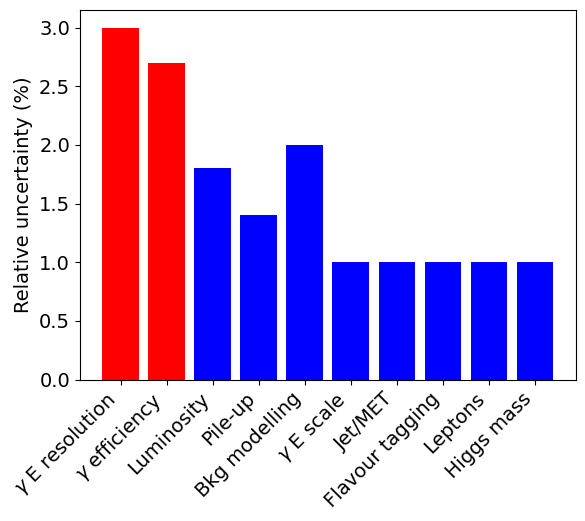

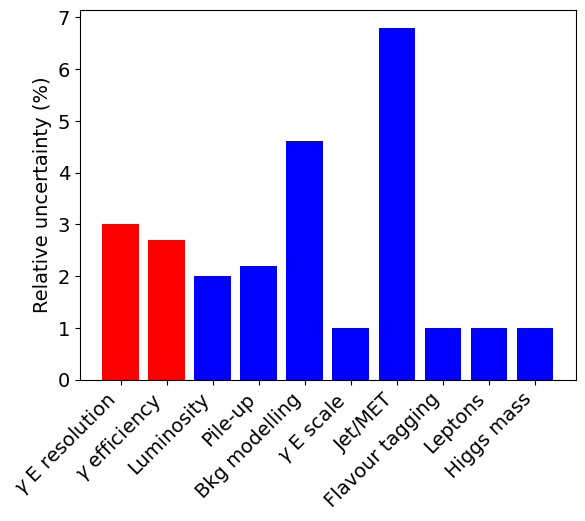

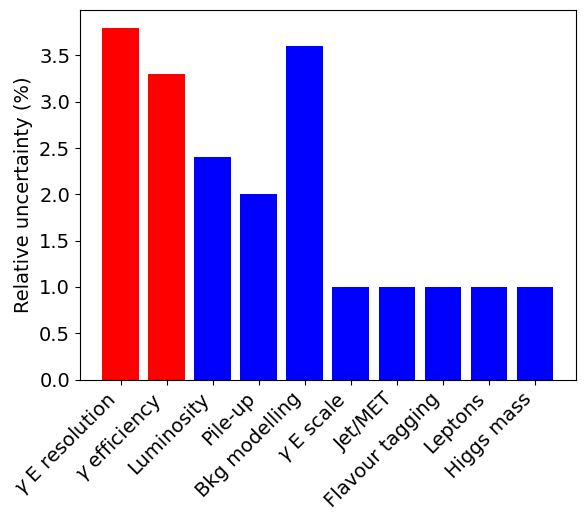

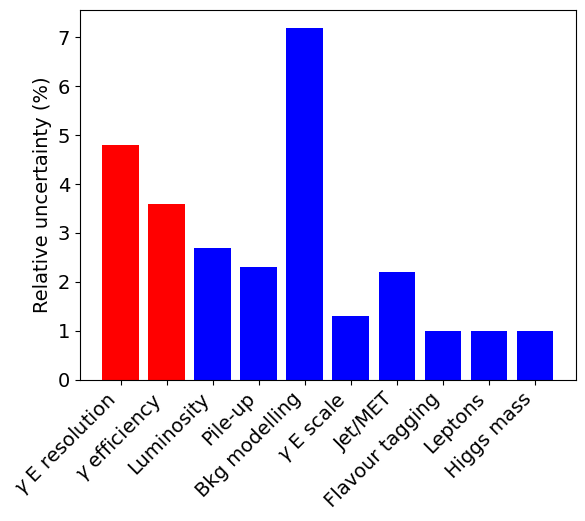

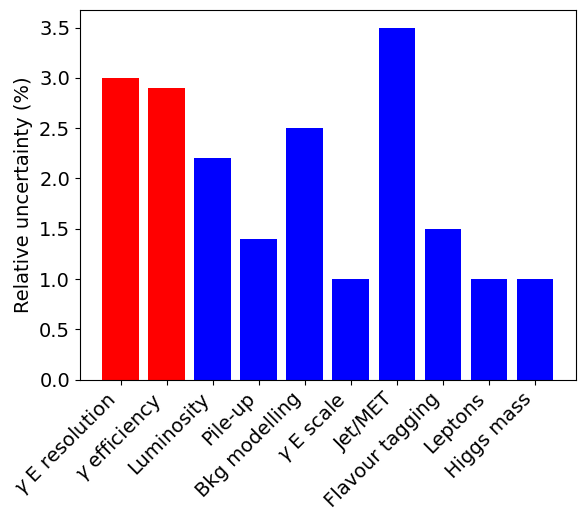

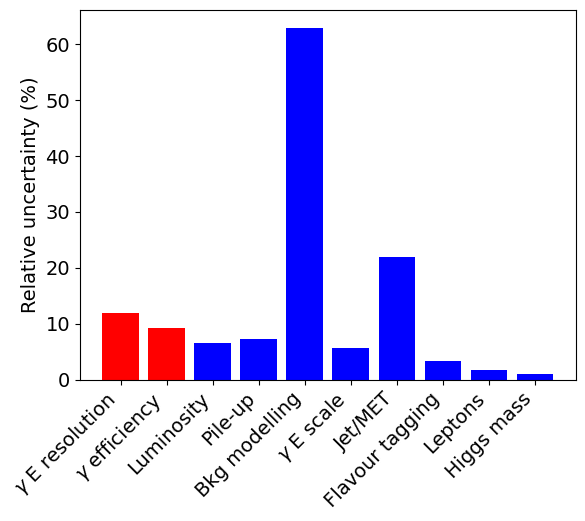

In [76]:
import re
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default')
font = {'size':14}
matplotlib.rc('font', **font)

procKey = 'VBF'
procKeys = tab.keys()[1:]
print(procKeys)
for procKey in procKeys:
    otherUnc = 0
    mainUncs = {}
    for rowI, row in enumerate(tab[procKey]):
        if 'Delta' in row or rowI < 6:
            continue
        unc = re.findall("pm (.*)\$", row)[0]
        # if unc == '1':
        #     otherUnc+=1.0
        #     continue
        unc = float(unc)
        name = tab['col0'][rowI].replace('\\hspace{3mm}', '').replace('energy', 'E').replace('Photon', '$\gamma$').replace('\\met','MET').replace('Background', 'Bkg').replace('boson ', '')
        mainUncs[name] = unc
        #mainUncs['other'] = otherUnc
        #print(mainUncs)

    fig, ax = plt.subplots()
    barc = ['blue' for i in mainUncs.values()]
    barc[0] = 'red'
    barc[1] = 'red'
    plt.bar(range(len(mainUncs)), list(mainUncs.values()), align='center', color=barc)
    plt.xticks(range(len(mainUncs)), list(mainUncs.keys()), rotation=45, ha='right')
    ax.set_ylabel("Relative uncertainty (%)")
    #ax.set_ylabel("$m_{\\tilde{\chi}^0}$ [GeV]")
    #ax.set_xlim(200,1600)
    #ax.set_ylim(0,10)
    outName = procKey.replace("$", '').replace(' + ', '').replace('\\','').replace('{', '').replace('}', '')
    print(outName)
    plt.savefig(f"{outName}_syst.pdf",bbox_inches='tight')

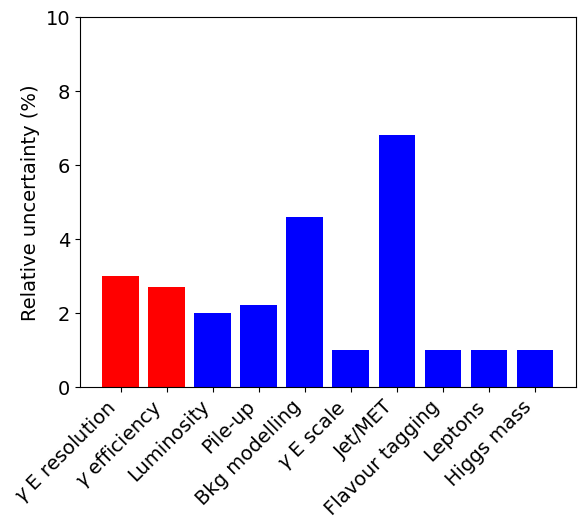